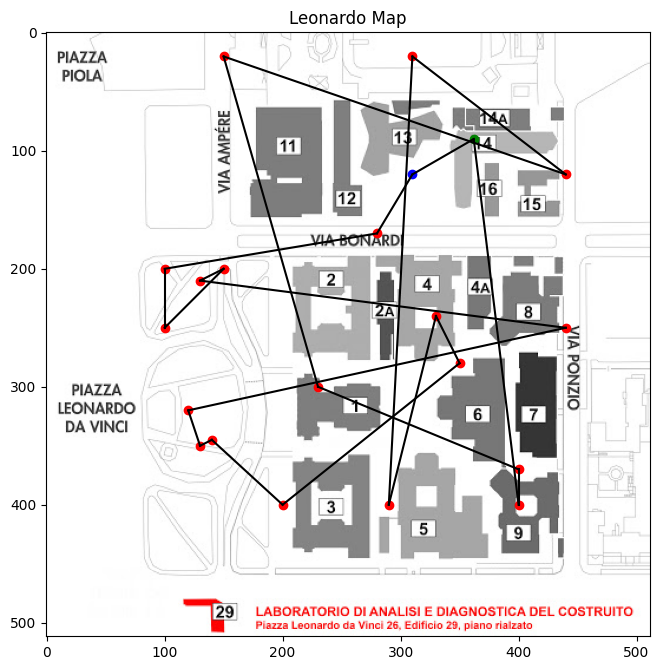

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img=plt.imread("poli2.jpg")
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title("Leonardo Map") 

positions = [[362,90],[310,120],[280,170],[100,200],[100,250],[150,200],[130,210],[440,250],[120,320],[130,350],[140,345],[200,400],[350,280],[330,240],[290,400],[310,20],
            [440,120],[150,20],[230,300],[400,370],[400,400],[362,90]]

# visualizza il percorso del drone che può muoversi ovunque
def trajectory(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x2],[y1,y2],'k-')

# visualizza il percorso del drone che può muoversi solo in linea retta
def trajectory_MAE(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x1],[y1,y2],'k-')
        plt.plot([x1,x2],[y2,y2],'k-')

trajectory(positions)
plt.imshow(img)
# visualizza l'immagine

#0.7 punti

In [ ]:
def MSE(pos):
    tot=0.0
    for i in range(len(pos)-1):
        #tot+=tot + (pos[i+1][0]-pos[i][0])**2 + (pos[i+1][1]-pos[i][1])**2
        tot+= + (pos[i+1][0]-pos[i][0])**2 + (pos[i+1][1]-pos[i][1])**2
    tot=tot/len(pos)
    return tot
        

def MAE(pos):
    tot=0.0
    for i in range(len(pos)-1):
        A=pos[i+1][0]-pos[i][0]
        B=pos[i+1][1]-pos[i][1]
        if A<0:
            A=-A
        if B<0:
            B=-B
        #tot+=tot+(A+B)
        tot+= (A+B)
    tot=tot/float(len(pos))
    return tot

In [ ]:
def performance(pos,metrics = MSE):
    loss = metrics(pos)
    return(loss)
    
print(f"MSE = {performance(positions,MSE)}")
print(f"MAE = {performance(positions, MAE)}")

MSE = 36818.09090909091
MAE = 181.36363636363637


# RANDOM OPT.

# 1 punto


In [ ]:
import random

class Random_Optimizer:
    def __init__(self, positions):
        self.positions = positions
        self.schedule = [positions[0]]

    def scheduler(self):
        temp=[]
        for i in range(len(self.positions)):
            temp.append(self.positions[i])
        random.shuffle(temp)
        temp.remove(self.schedule[0])
        for i in range(len(temp)):
            self.schedule.append(temp[i])
        return self.schedule
    
    def plot(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map") 
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x2],[y1,y2],'k-')

    def plot_MAE(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map")      
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x1],[y1,y2],'k-')
            plt.plot([x1,x2],[y2,y2],'k-')

# GREEDY OPT.

# 1.5 punti

C'è un pasticciotto, in quanto non vengono considerati gli ultimi due punti, per come è strutturato il codice. L'implementazione, tolto questo, è più o meno corretta. (attenzione all'assegnamento delle liste, però)

In [ ]:
def Calculate(positions, current_pos):
    minpos=99999999999.0
    minindex=0
    for i in range(len(positions)):
        d=Distance(current_pos, positions[i])
        if d<minpos: 
            minpos=d
            minindex=i
    return positions[minindex]


def Distance(A,B):
    d=((B[0]-A[0])**2+(B[1]-A[1])**2)**(1/2)
    return d


class Greedy_Optimizer(Random_Optimizer):
    def __init__(self, positions, loss):
        super().__init__(positions) # non toccare, uso il constructor della classe padre
        self.loss = loss

    def scheduler(self):
        temp=self.positions
        curr=self.schedule[0]
        temp.remove(self.schedule[0])
        for i in range(len(self.positions)-1):
            best_next_position=Calculate(temp, curr)
            self.schedule.append(best_next_position)
            temp.remove(best_next_position)
            curr=best_next_position

        return (self.schedule)

Performance of Random_Opt = 59678.27272727273
Performance of Initial schedule = 36818.09090909091
Performance of Greedy_Opt = 9493.047619047618


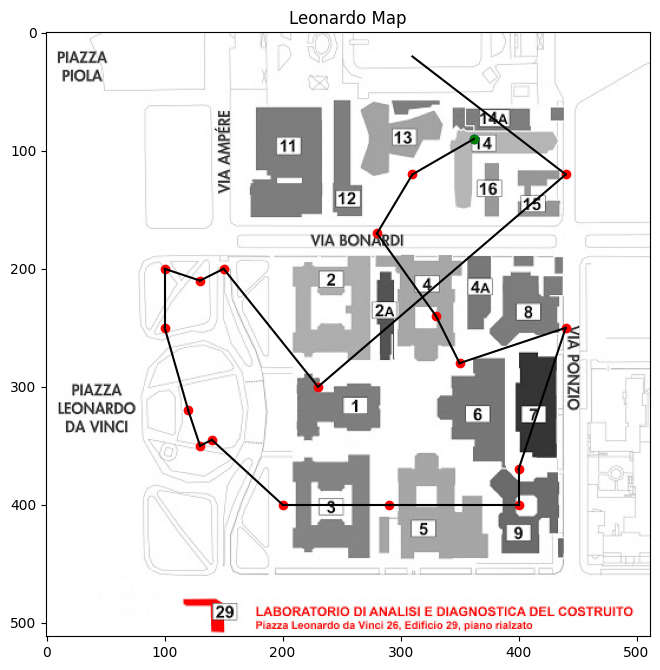

In [ ]:
random.seed(0)
metrics = MSE
D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)


print(f"Performance of Random_Opt = {performance(D1.scheduler(), metrics)}")
print(f"Performance of Initial schedule = {performance(positions, metrics)}")
print(f"Performance of Greedy_Opt = {performance(D2.scheduler(), metrics)}")



D2.plot()
#D2.plot_MAE()
plt.imshow(img)

In [ ]:
D2.schedule

[[362, 90],
 [362, 90],
 [310, 120],
 [280, 170],
 [330, 240],
 [350, 280],
 [440, 250],
 [400, 370],
 [400, 400],
 [290, 400],
 [200, 400],
 [140, 345],
 [130, 350],
 [120, 320],
 [100, 250],
 [100, 200],
 [130, 210],
 [150, 200],
 [230, 300],
 [440, 120],
 [310, 20]]